# Medicare Fraud Detection

### Data 698: Data Science Research Project - Spring 2019

### Student: Chunhui Zhu

Medicare_Provider_Utilization_and_Payment_Data__Physician_and_Other_Supplier_PUF_CY2016.csv: https://data.cms.gov/Medicare-Physician-Supplier/Medicare-Provider-Utilization-and-Payment-Data-Phy/utc4-f9xp

LEIE2019.csv: https://oig.hhs.gov/exclusions/exclusions_list.asp

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib as plt
import pickle

import matplotlib.pyplot as plt
from pandas import Series, DataFrame

import scipy
from scipy.stats import spearmanr
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale

from sklearn.linear_model import LogisticRegression
import xgboost

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport,PrecisionRecallCurve


#I used the searching result of unique NPI finding in a specifit year in previous steps. 
#load Fraud unique NPI from pickle, example for 2016 yr: "fraud_df16_pickle"
#close pickle
#function returns pd df for fraud_NPI in that year
def loadfraudNPI (year):
    y=str(year)
    fraud_pkl=open("fraud_df"+str(y[2:4])+"_pickle","rb")
    fraud_NPI=pickle.load(fraud_pkl)
    print(fraud_NPI.head(5))
    print("The number of fraud NPI found in " + y +" is " + str(len(fraud_NPI)) + ".")
    fraud_pkl.close()
    return (fraud_NPI)

In [2]:
#example pickle name conver2016_pickle
def loadconvtdf (year):
    df_pkl=open("convt"+str(year)+"_pickle","rb")
    df=pickle.load(df_pkl)
    print("finished load for convt"+str(year)+"_pickle.")
    df_pkl.close()
    return (df)

In [3]:
convt2016df=loadconvtdf(2016)
convt2015df=loadconvtdf(2015)
convt2014df=loadconvtdf(2014)
convt2013df=loadconvtdf(2013)
convt2012df=loadconvtdf(2012)

finished load for convt2016_pickle.
finished load for convt2015_pickle.
finished load for convt2014_pickle.
finished load for convt2013_pickle.
finished load for convt2012_pickle.


In [4]:
#made sure it is the right data set from last process
convt2015df.head()

,npi,type,hcpcs_c,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,avg_allowed_amt,avg_payment_amt,avg_submitted_chrg_amt,city,state,Fraud
1,1003000126,0.0,99217,23.0,23.0,23.0,72.680000,54.502609,328.000000,3,2,0
2,1003000126,0.0,99219,18.0,18.0,18.0,135.850000,100.958889,614.000000,3,2,0
3,1003000126,0.0,99221,59.0,58.0,59.0,101.365085,79.469661,333.288136,3,2,0
4,1003000126,0.0,99222,132.0,130.0,132.0,139.010455,107.933409,356.492424,3,2,0
5,1003000126,0.0,99223,220.0,215.0,220.0,205.185955,157.908955,631.186364,3,2,0


## Observation - line_srvc_cnt

### 2015

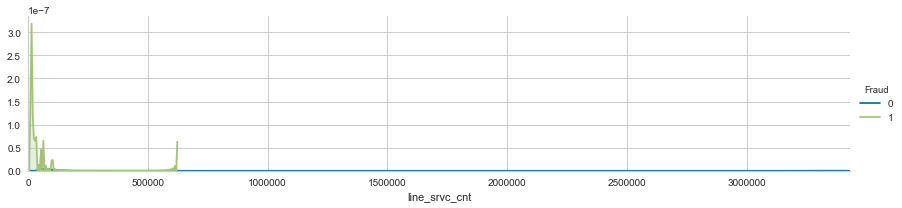

In [7]:
facet = sb.FacetGrid(convt2015df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'line_srvc_cnt',shade=True)
facet.set(xlim=(0,convt2015df.line_srvc_cnt.max()))
facet.add_legend()

plt.show()

### 2014

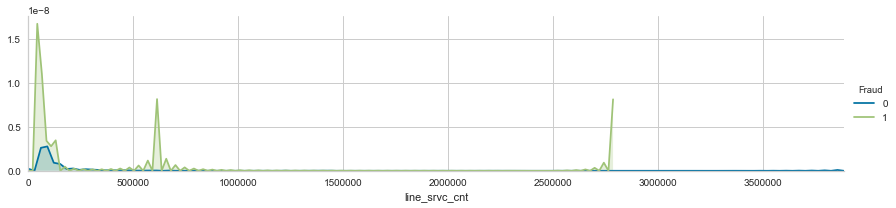

In [172]:
facet = sb.FacetGrid(convt2014df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'line_srvc_cnt',shade=True)
facet.set(xlim=(0,convt2014df.line_srvc_cnt.max()))
facet.add_legend()

plt.show()

### 2013

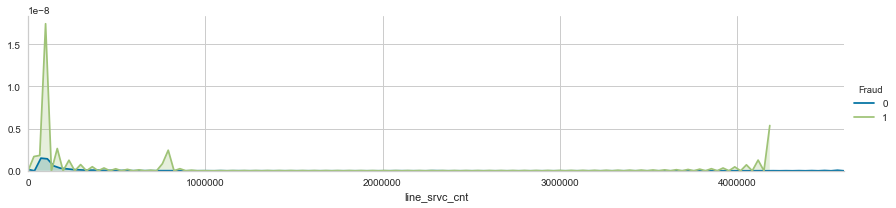

In [173]:
facet = sb.FacetGrid(convt2013df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'line_srvc_cnt',shade=True)
facet.set(xlim=(0,convt2013df.line_srvc_cnt.max()))
facet.add_legend()

plt.show()

### 2012

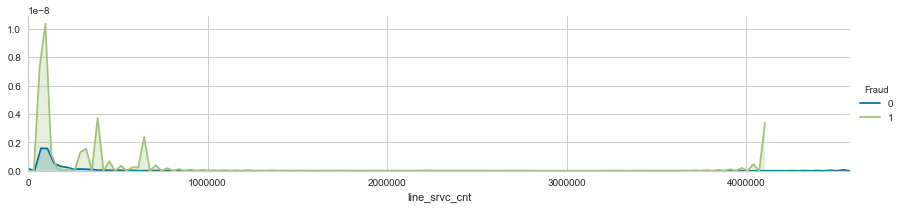

In [174]:
facet = sb.FacetGrid(convt2012df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'line_srvc_cnt',shade=True)
facet.set(xlim=(0,convt2012df.line_srvc_cnt.max()))
facet.add_legend()

plt.show()

### 'line_srvc_cnt' range (0,1000000)

### 2015

(0, 1000000)

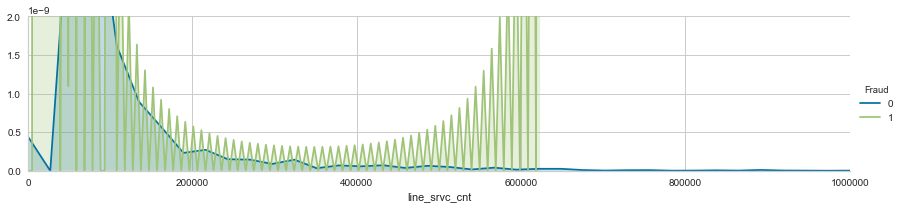

In [132]:
facet = sb.FacetGrid(convt2015df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'line_srvc_cnt',shade=True)
facet.set(xlim=(0,convt2015df.line_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.000000002)
plt.xlim(0,1000000)

### 2014

(0, 1000000)

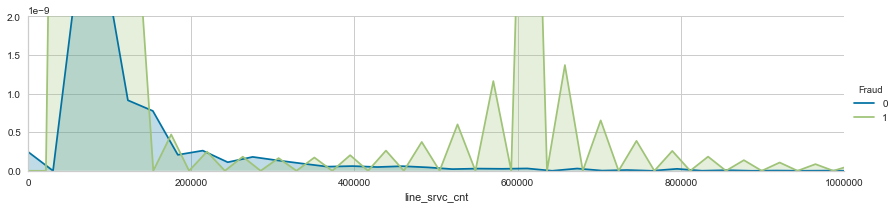

In [125]:
facet = sb.FacetGrid(convt2014df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'line_srvc_cnt',shade=True)
facet.set(xlim=(0,convt2014df.line_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.000000002)
plt.xlim(0,1000000)

### 2013

(0, 1000000)

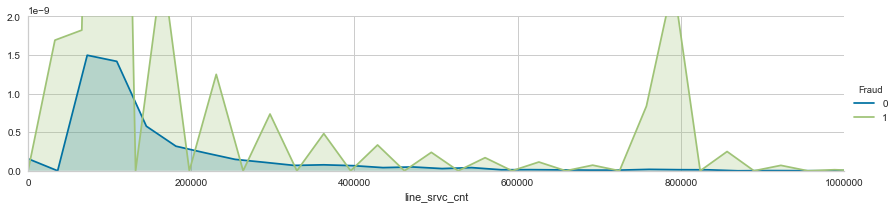

In [175]:
facet = sb.FacetGrid(convt2013df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'line_srvc_cnt',shade=True)
facet.set(xlim=(0,convt2013df.line_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.000000002)
plt.xlim(0,1000000)

### 2012

(0, 1000000)

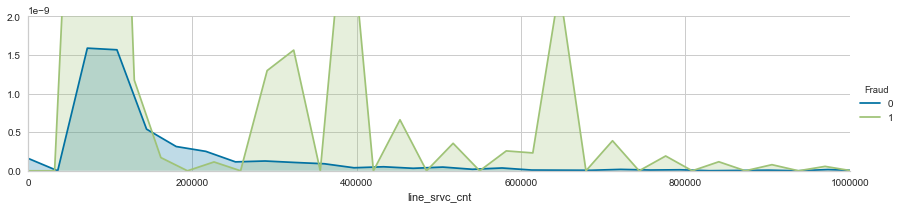

In [177]:
facet = sb.FacetGrid(convt2012df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'line_srvc_cnt',shade=True)
facet.set(xlim=(0,convt2012df.line_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.000000002)
plt.xlim(0,1000000)

### 'line_srvc_cnt' rang (2500000,4500000)

### 2015

(2500000, 4500000)

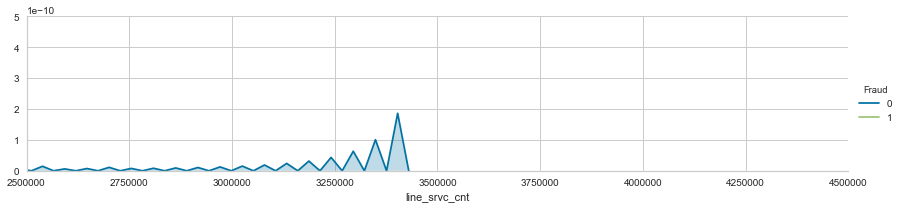

In [179]:
facet = sb.FacetGrid(convt2015df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'2015 line_srvc_cnt',shade=True)
facet.set(xlim=(0,convt2015df.line_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.0000000005)
plt.xlim(2500000,4500000)

### 2014

(2500000, 4500000)

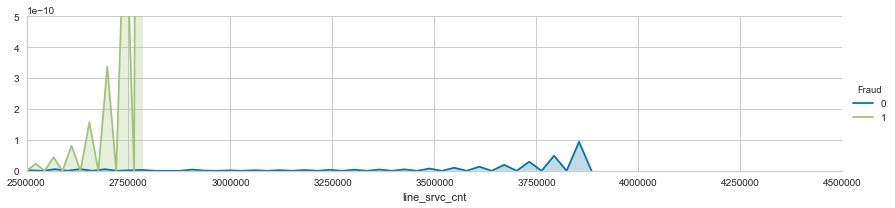

In [180]:
facet = sb.FacetGrid(convt2014df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'2014 line_srvc_cnt',shade=True)
facet.set(xlim=(0,convt2014df.line_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.0000000005)
plt.xlim(2500000,4500000)

### 2013

(3500000, 4500000)

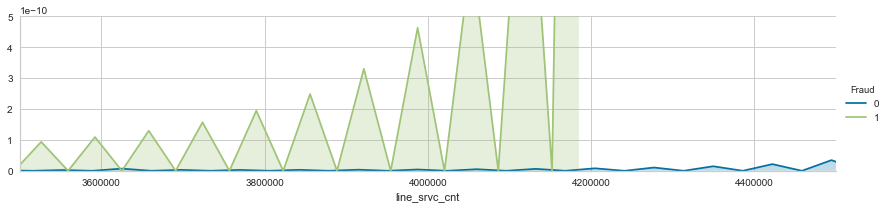

In [127]:
facet = sb.FacetGrid(convt2013df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'2013 line_srvc_cnt',shade=True)
facet.set(xlim=(0,convt2013df.line_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.0000000005)
plt.xlim(2500000,4500000)

### 2012

(2500000, 4500000)

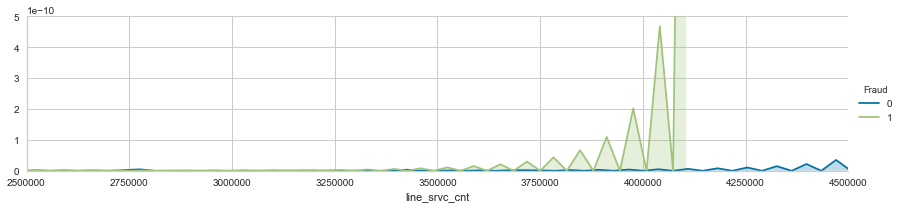

In [181]:
facet = sb.FacetGrid(convt2012df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'2012 line_srvc_cnt',shade=True)
facet.set(xlim=(0,convt2012df.line_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.0000000005)
plt.xlim(2500000,4500000)

## Observation - bene_unique_cnt

### 2015

(0, 1000000)

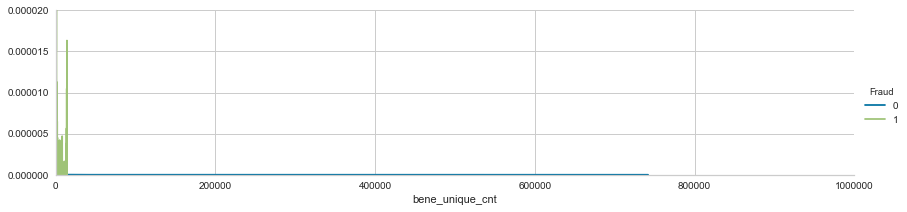

In [188]:
facet = sb.FacetGrid(convt2015df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'bene_unique_cnt',shade=True)
facet.set(xlim=(0,convt2015df.line_srvc_cnt.max()))
facet.add_legend()
plt.ylim(0,0.00002)
plt.xlim(0,1000000)

### 2014

(0, 1000000)

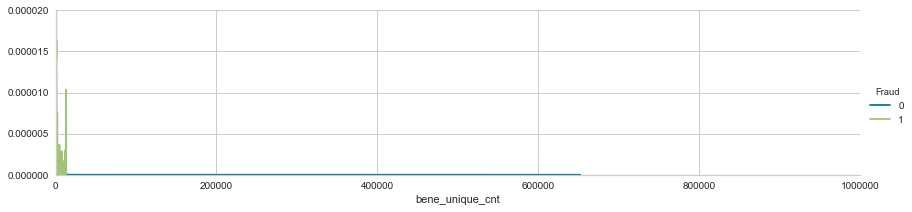

In [189]:
facet = sb.FacetGrid(convt2014df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'bene_unique_cnt',shade=True)
facet.set(xlim=(0,convt2014df.line_srvc_cnt.max()))
facet.add_legend()
plt.ylim(0,0.00002)
plt.xlim(0,1000000)

### 2013

(0, 1000000)

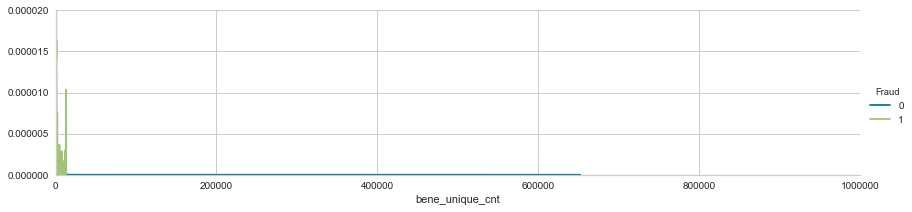

In [190]:
facet = sb.FacetGrid(convt2014df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'bene_unique_cnt',shade=True)
facet.set(xlim=(0,convt2014df.line_srvc_cnt.max()))
facet.add_legend()
plt.ylim(0,0.00002)
plt.xlim(0,1000000)

### 2012

(0, 1000000)

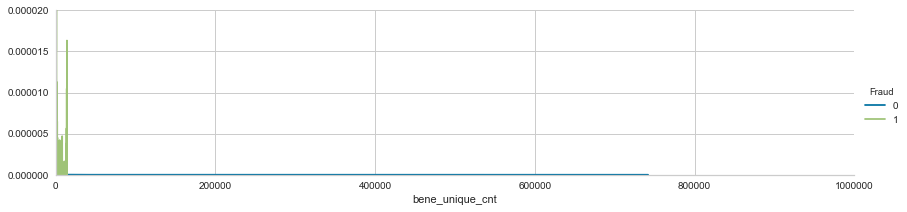

In [191]:
facet = sb.FacetGrid(convt2015df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'bene_unique_cnt',shade=True)
facet.set(xlim=(0,convt2012df.line_srvc_cnt.max()))
facet.add_legend()
plt.ylim(0,0.00002)
plt.xlim(0,1000000)

### 'bene_unique_cnt' rang (0,15000)

### 2015 

(0, 15000)

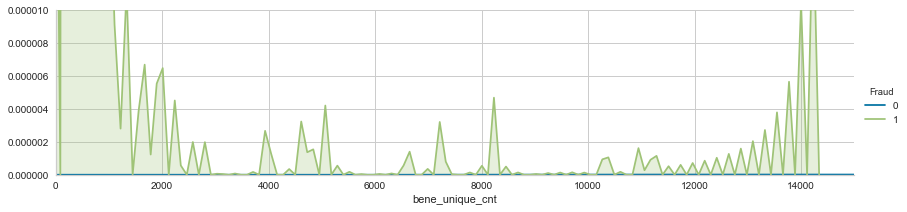

In [192]:
facet = sb.FacetGrid(convt2015df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'bene_unique_cnt',shade=True)
facet.set(xlim=(0,convt2015df.line_srvc_cnt.max()))
facet.add_legend()
plt.ylim(0,0.00001)
plt.xlim(0,15000)

### 2014

(0, 15000)

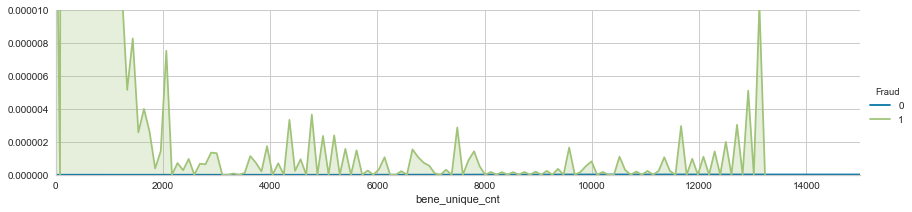

In [193]:
facet = sb.FacetGrid(convt2014df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'bene_unique_cnt',shade=True)
facet.set(xlim=(0,convt2014df.line_srvc_cnt.max()))
facet.add_legend()
plt.ylim(0,0.00001)
plt.xlim(0,15000)

### 2013

(0, 15000)

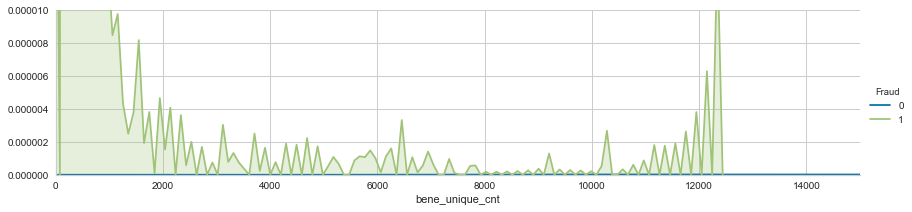

In [194]:
facet = sb.FacetGrid(convt2013df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'bene_unique_cnt',shade=True)
facet.set(xlim=(0,convt2013df.line_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.00001)
plt.xlim(0,15000)

### 2012

(0, 15000)

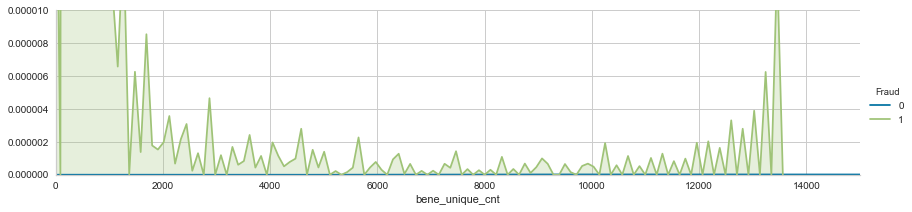

In [196]:
facet = sb.FacetGrid(convt2012df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'bene_unique_cnt',shade=True)
facet.set(xlim=(0,convt2012df.line_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.00001)
plt.xlim(0,15000)

## Observation - bene_day_srvc_cnt	

### 2015

(0, 1200000)

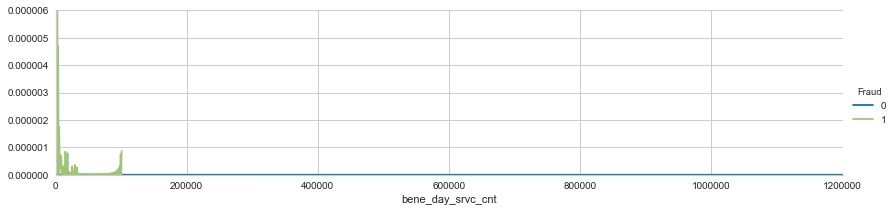

In [76]:
facet = sb.FacetGrid(convt2015df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'bene_day_srvc_cnt',shade=True)
facet.set(xlim=(0,convt2015df.bene_day_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.000006)
plt.xlim(0,1200000)

### 2014

(0, 1200000)

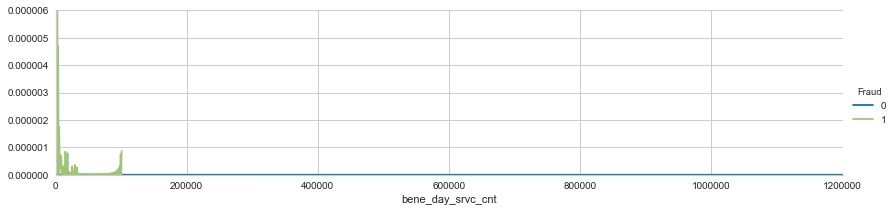

In [197]:
facet = sb.FacetGrid(convt2015df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'bene_day_srvc_cnt',shade=True)
facet.set(xlim=(0,convt2015df.bene_day_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.000006)
plt.xlim(0,1200000)

### 2013

(0, 1200000)

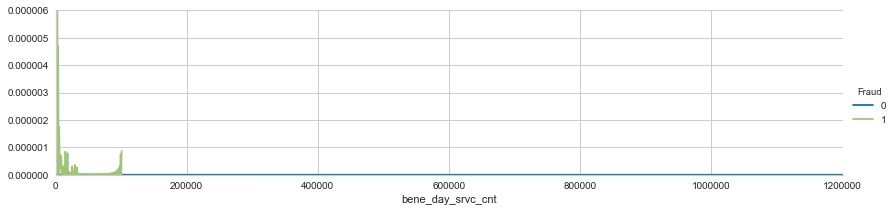

In [198]:
facet = sb.FacetGrid(convt2015df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'bene_day_srvc_cnt',shade=True)
facet.set(xlim=(0,convt2015df.bene_day_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.000006)
plt.xlim(0,1200000)

### 2012

(0, 1200000)

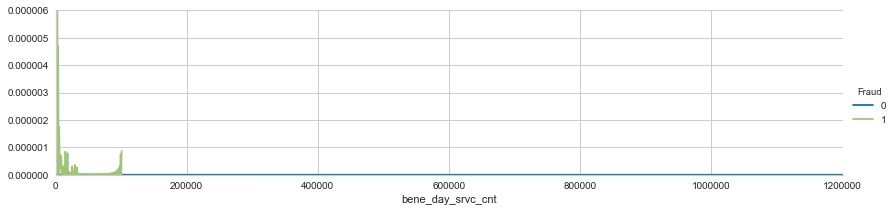

In [199]:
facet = sb.FacetGrid(convt2015df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'bene_day_srvc_cnt',shade=True)
facet.set(xlim=(0,convt2015df.bene_day_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.000006)
plt.xlim(0,1200000)

### 'bene_day_srvc_cnt' rang (0,120000)

### 2015

(0, 120000)

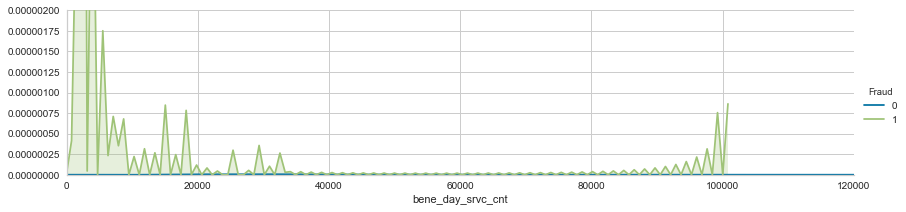

In [201]:
facet = sb.FacetGrid(convt2015df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'bene_day_srvc_cnt',shade=True)
facet.set(xlim=(0,convt2015df.bene_day_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.000002)
plt.xlim(0,120000)

### 2014

(0, 120000)

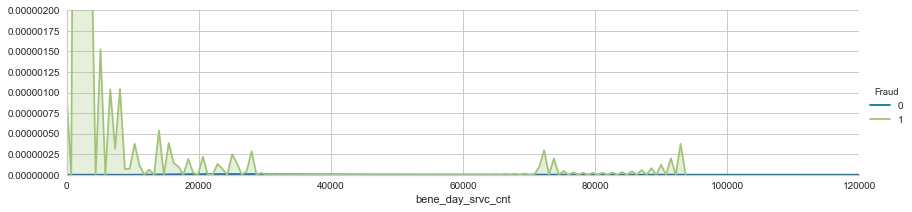

In [202]:
facet = sb.FacetGrid(convt2014df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'bene_day_srvc_cnt',shade=True)
facet.set(xlim=(0,convt2014df.bene_day_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.000002)
plt.xlim(0,120000)

### 2013

(0, 120000)

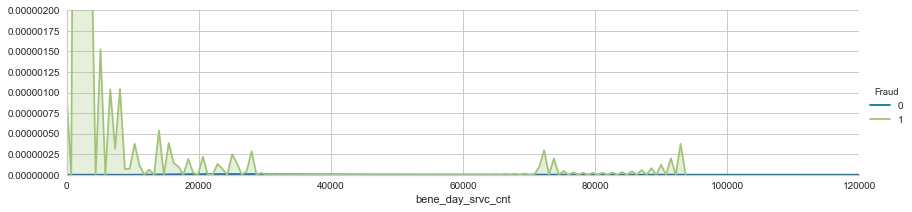

In [205]:
facet = sb.FacetGrid(convt2014df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'bene_day_srvc_cnt',shade=True)
facet.set(xlim=(0,convt2014df.bene_day_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.000002)
plt.xlim(0,120000)

### 2012

(0, 120000)

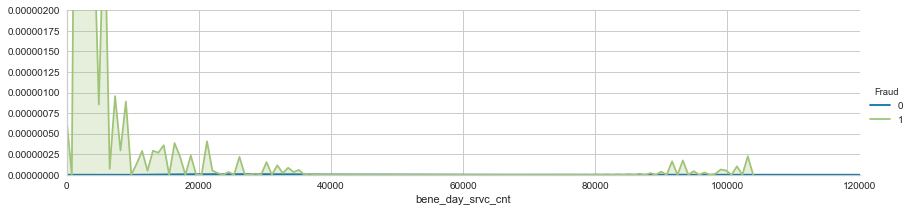

In [203]:
facet = sb.FacetGrid(convt2012df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'bene_day_srvc_cnt',shade=True)
facet.set(xlim=(0,convt2012df.bene_day_srvc_cnt.max()))
facet.add_legend()

plt.ylim(0,0.000002)
plt.xlim(0,120000)

## Observation - avg_allowed_amt

### 2015

(0, 40000)

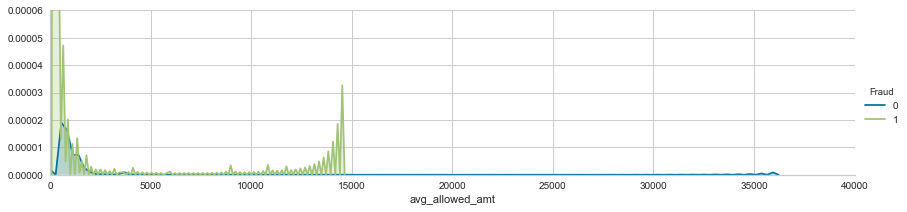

In [69]:
facet = sb.FacetGrid(convt2015df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_allowed_amt',shade=True)
facet.set(xlim=(0,convt2015df.avg_allowed_amt.max()))
facet.add_legend()

plt.ylim(0,0.00006)
plt.xlim(0,40000)

### 2014

(0, 40000)

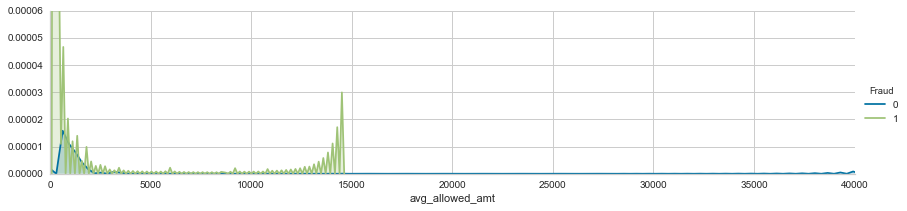

In [206]:
facet = sb.FacetGrid(convt2014df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_allowed_amt',shade=True)
facet.set(xlim=(0,convt2014df.avg_allowed_amt.max()))
facet.add_legend()

plt.ylim(0,0.00006)
plt.xlim(0,40000)

### 2013

(0, 40000)

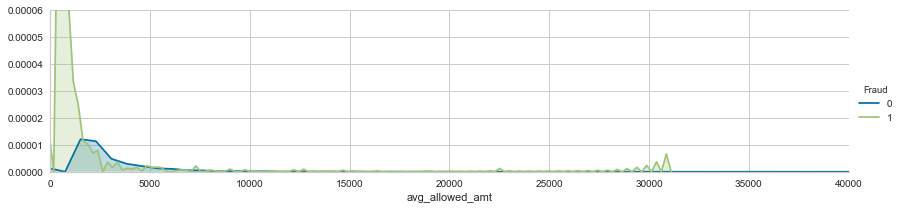

In [207]:
facet = sb.FacetGrid(convt2013df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_allowed_amt',shade=True)
facet.set(xlim=(0,convt2013df.avg_allowed_amt.max()))
facet.add_legend()

plt.ylim(0,0.00006)
plt.xlim(0,40000)

### 2012

(0, 40000)

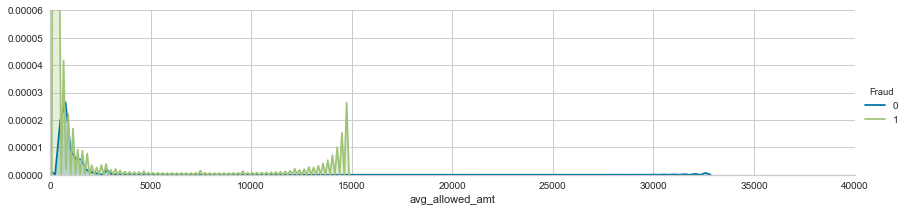

In [208]:
facet = sb.FacetGrid(convt2012df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_allowed_amt',shade=True)
facet.set(xlim=(0,convt2012df.avg_allowed_amt.max()))
facet.add_legend()

plt.ylim(0,0.00006)
plt.xlim(0,40000)

### 'avg_allowed_amt' rang (0,15000)

### 2015

(0, 15000)

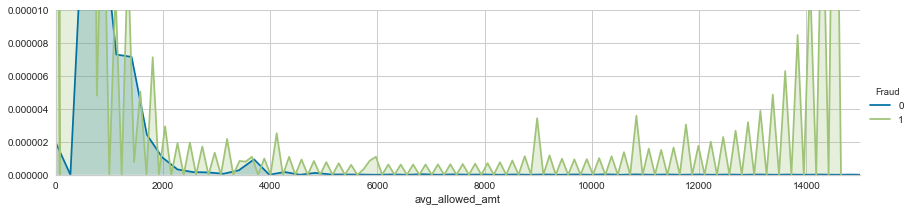

In [155]:
facet = sb.FacetGrid(convt2015df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_allowed_amt',shade=True)
facet.set(xlim=(0,convt2015df.avg_allowed_amt.max()))
facet.add_legend()

plt.ylim(0,0.00001)
plt.xlim(0,15000)

### 2014

(0, 15000)

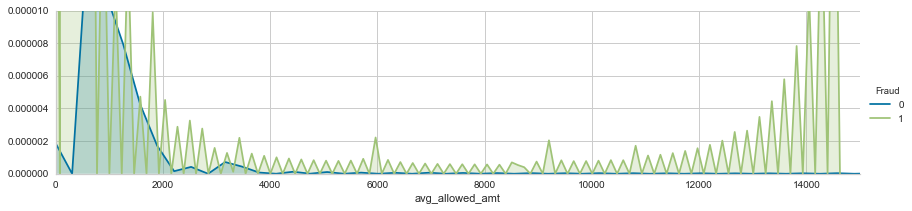

In [209]:
facet = sb.FacetGrid(convt2014df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_allowed_amt',shade=True)
facet.set(xlim=(0,convt2014df.avg_allowed_amt.max()))
facet.add_legend()

plt.ylim(0,0.00001)
plt.xlim(0,15000)

### 2013

(0, 15000)

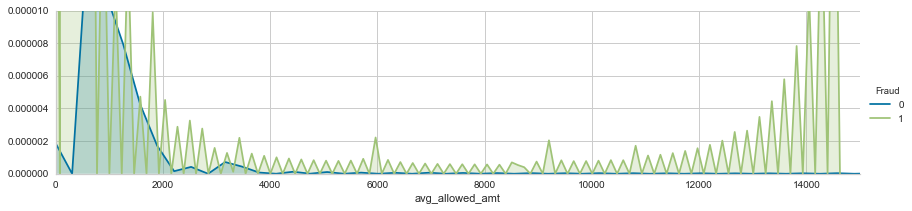

In [210]:
facet = sb.FacetGrid(convt2014df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_allowed_amt',shade=True)
facet.set(xlim=(0,convt2014df.avg_allowed_amt.max()))
facet.add_legend()

plt.ylim(0,0.00001)
plt.xlim(0,15000)

### 2012

(0, 15000)

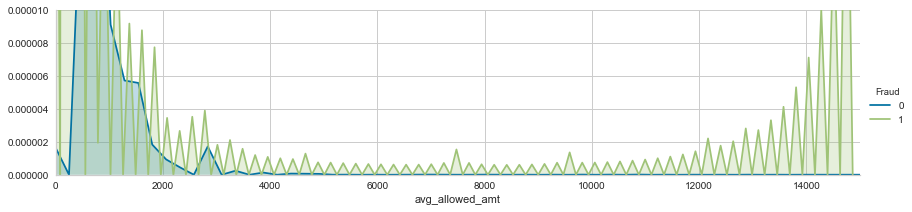

In [211]:
facet = sb.FacetGrid(convt2012df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_allowed_amt',shade=True)
facet.set(xlim=(0,convt2012df.avg_allowed_amt.max()))
facet.add_legend()

plt.ylim(0,0.00001)
plt.xlim(0,15000)

## Observation - avg_payment_amt

### 2015

(0, 30000)

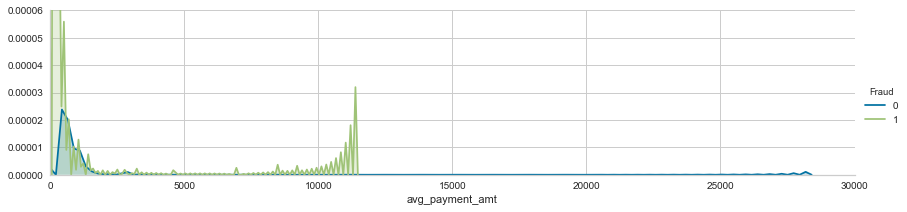

In [80]:
facet = sb.FacetGrid(convt2015df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_payment_amt',shade=True)
facet.set(xlim=(0,convt2015df.avg_payment_amt.max()))
facet.add_legend()

plt.ylim(0,0.00006)
plt.xlim(0,30000)

### 2014

(0, 30000)

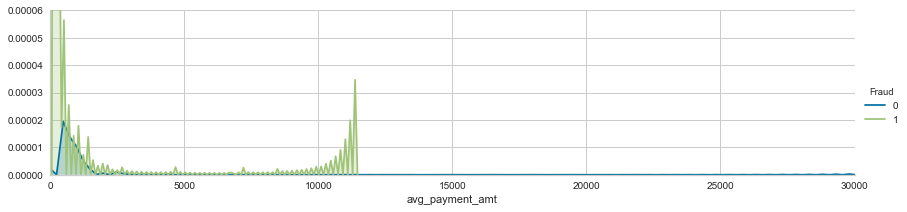

In [212]:
facet = sb.FacetGrid(convt2014df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_payment_amt',shade=True)
facet.set(xlim=(0,convt2014df.avg_payment_amt.max()))
facet.add_legend()

plt.ylim(0,0.00006)
plt.xlim(0,30000)

### 2013

In [ ]:
facet = sb.FacetGrid(convt2013df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_payment_amt',shade=True)
facet.set(xlim=(0,convt2013df.avg_payment_amt.max()))
facet.add_legend()

plt.ylim(0,0.00006)
plt.xlim(0,30000)

### 2012

In [ ]:
facet = sb.FacetGrid(convt2012df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_payment_amt',shade=True)
facet.set(xlim=(0,convt2012df.avg_payment_amt.max()))
facet.add_legend()

plt.ylim(0,0.00006)
plt.xlim(0,30000)

### 'avg_payment_amt' rang (0,12000)

### 2015

(0, 12000)

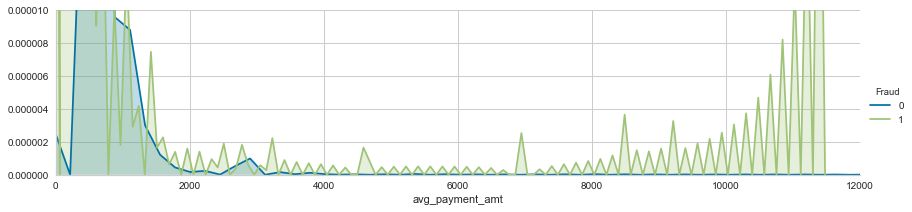

In [213]:
facet = sb.FacetGrid(convt2015df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_payment_amt',shade=True)
facet.set(xlim=(0,convt2015df.avg_payment_amt.max()))
facet.add_legend()

plt.ylim(0,0.00001)
plt.xlim(0,12000)

### 2014

(0, 12000)

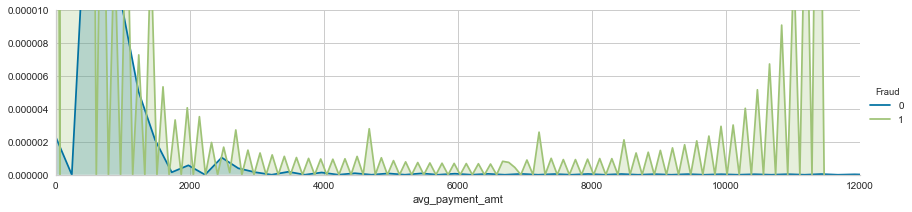

In [216]:
facet = sb.FacetGrid(convt2014df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_payment_amt',shade=True)
facet.set(xlim=(0,convt2014df.avg_payment_amt.max()))
facet.add_legend()

plt.ylim(0,0.00001)
plt.xlim(0,12000)

### 2013

(0, 12000)

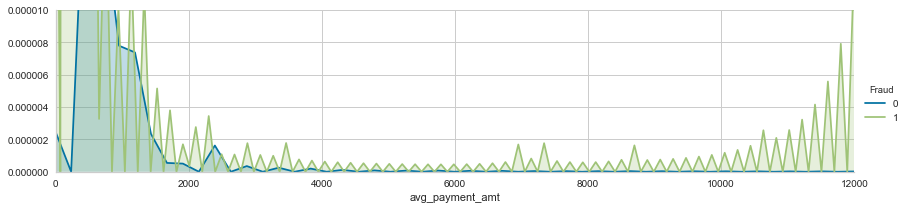

In [214]:
facet = sb.FacetGrid(convt2013df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_payment_amt',shade=True)
facet.set(xlim=(0,convt2013df.avg_payment_amt.max()))
facet.add_legend()

plt.ylim(0,0.00001)
plt.xlim(0,12000)

### 2012

(0, 12000)

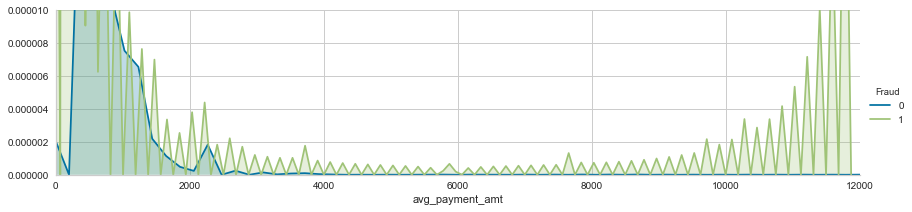

In [215]:
facet = sb.FacetGrid(convt2012df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_payment_amt',shade=True)
facet.set(xlim=(0,convt2012df.avg_payment_amt.max()))
facet.add_legend()

plt.ylim(0,0.00001)
plt.xlim(0,12000)

## Observation - avg_submitted_chrg_amt

### 2015

(0, 80000)

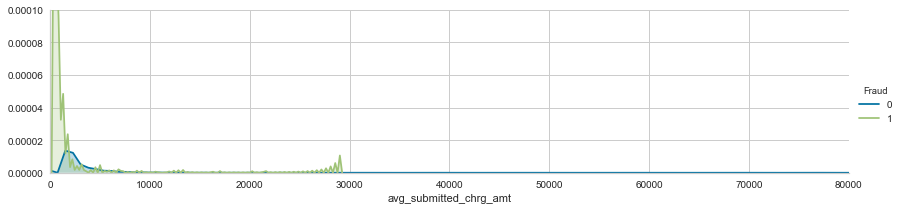

In [165]:
facet = sb.FacetGrid(convt2015df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_submitted_chrg_amt',shade=True)
facet.set(xlim=(0,convt2015df.avg_submitted_chrg_amt.max()))
facet.add_legend()

plt.ylim(0,0.0001)
plt.xlim(0,80000)

### 2014

(0, 80000)

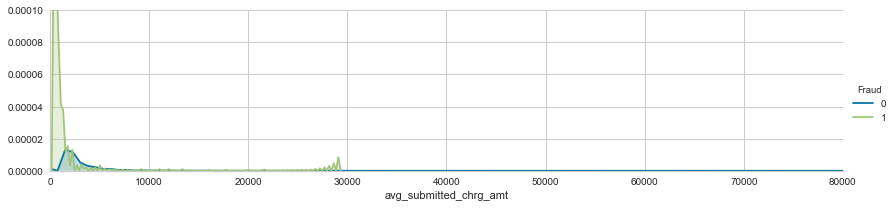

In [217]:
facet = sb.FacetGrid(convt2014df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_submitted_chrg_amt',shade=True)
facet.set(xlim=(0,convt2014df.avg_submitted_chrg_amt.max()))
facet.add_legend()

plt.ylim(0,0.0001)
plt.xlim(0,80000)

### 2013

(0, 80000)

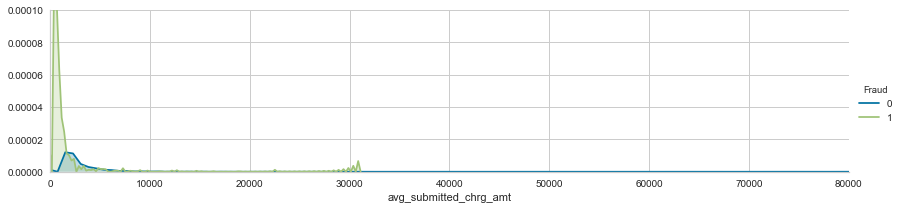

In [218]:
facet = sb.FacetGrid(convt2013df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_submitted_chrg_amt',shade=True)
facet.set(xlim=(0,convt2013df.avg_submitted_chrg_amt.max()))
facet.add_legend()

plt.ylim(0,0.0001)
plt.xlim(0,80000)

### 2012

(0, 80000)

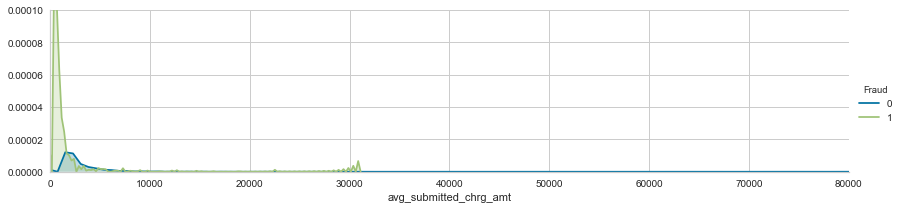

In [219]:
facet = sb.FacetGrid(convt2013df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_submitted_chrg_amt',shade=True)
facet.set(xlim=(0,convt2013df.avg_submitted_chrg_amt.max()))
facet.add_legend()

plt.ylim(0,0.0001)
plt.xlim(0,80000)

### 'avg_submitted_chrg_amt' rang (0,30000)

### 2015

(0, 30000)

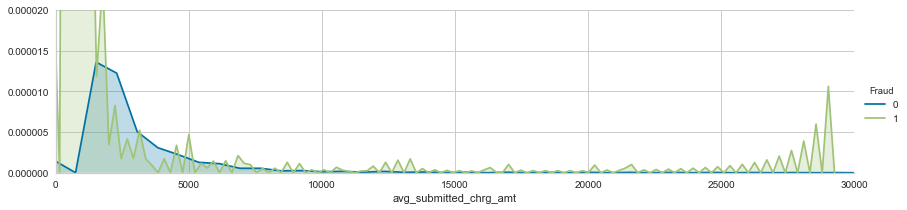

In [166]:
facet = sb.FacetGrid(convt2015df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_submitted_chrg_amt',shade=True)
facet.set(xlim=(0,convt2015df.avg_submitted_chrg_amt.max()))
facet.add_legend()

plt.ylim(0,0.00002)
plt.xlim(0,30000)

### 2014

(0, 30000)

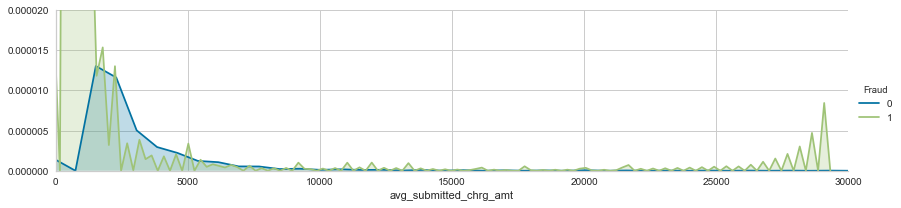

In [220]:
facet = sb.FacetGrid(convt2014df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_submitted_chrg_amt',shade=True)
facet.set(xlim=(0,convt2014df.avg_submitted_chrg_amt.max()))
facet.add_legend()

plt.ylim(0,0.00002)
plt.xlim(0,30000)

### 2013

(0, 30000)

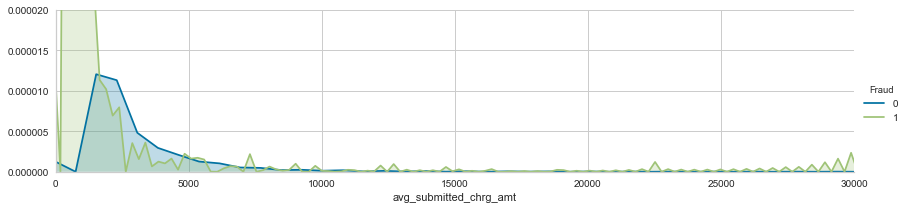

In [221]:
facet = sb.FacetGrid(convt2013df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_submitted_chrg_amt',shade=True)
facet.set(xlim=(0,convt2013df.avg_submitted_chrg_amt.max()))
facet.add_legend()

plt.ylim(0,0.00002)
plt.xlim(0,30000)

### 2012

(0, 30000)

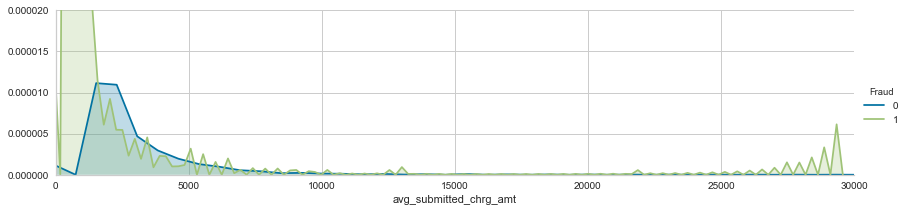

In [222]:
facet = sb.FacetGrid(convt2012df,hue="Fraud",aspect=4)
facet.map(sb.kdeplot,'avg_submitted_chrg_amt',shade=True)
facet.set(xlim=(0,convt2012df.avg_submitted_chrg_amt.max()))
facet.add_legend()

plt.ylim(0,0.00002)
plt.xlim(0,30000)

## References:

[Medicare Fee-For-Service Provider Utilization & Payment Data Physician and Other Supplier Public Use File: A Methodological Overview] last updated: May 3, 2018, The Centers of Medicare and Medicare Services, Office of Enterprise Data and Analytics https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Physician-and-Other-Supplier.html

[Medicare Provider Utilization and Payment Data Physician and Other Supplier PUF: Frequently Asked Questions] last updated: May 4, 2018, The Centers of Medicare and Medicare Services, Office of Enterprise Data and Analytics https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Downloads/Physician_FAQ.pdf

[List of Excluded Individuals/Entities (LEIE)] 02-2019 Updated LEIE Database, https://oig.hhs.gov/exclusions/exclusions_list.asp; 

[The Detection of Medicare Fraud Using Machine Learning Methods with Excluded Provider Labels] by Richard A. Bauder, Taghi M. Khoshgoftaar, College of Engineering & Computer Science, Florida Atlantic University (2018)